# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset by [downloading the file](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here) or using this link: https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### ✍️ Your Response: 🔧
1. There are many columns, and some important ones like agent and company have a lot of missing values. Also, some bookings show an ADR (price per night) of 0, which looks unusual and may need attention.

## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [5]:
# Select features
features = ['lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adr', 'total_of_special_requests']
df_selected = df[features].copy()

# Drop missing values
df_selected.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected)

# Store the result in a new DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Display the first few rows of the scaled data
display(scaled_df.head())

,lead_time,stays_in_week_nights,stays_in_weekend_nights,adr,total_of_special_requests
0,2.227051,-1.310240,-0.92889,-2.015038,-0.720694
1,5.923385,-1.310240,-0.92889,-2.015038,-0.720694
2,-0.907814,-0.786207,-0.92889,-0.530935,-0.720694
3,-0.851667,-0.786207,-0.92889,-0.530935,-0.720694
4,-0.842309,-0.262174,-0.92889,-0.075810,0.540666


### ✍️ Your Response: 🔧
1. I selected lead_time, stays_in_week_nights, stays_in_weekend_nights, adr, and total_of_special_requests because they represent meaningful customer behavior. These features describe how early guests book, how long they stay, how much they spend, and how many special requests they make.

2. I expect to see segments such as last-minute short-stay guests, long-stay planners, and higher-paying guests who request more services.


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



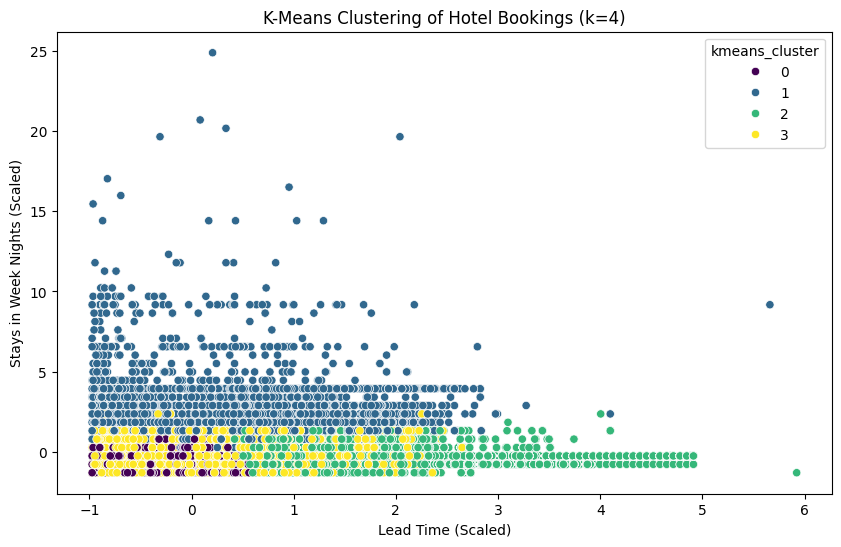

In [7]:
# Choose k=4
k = 4

# Fit KMeans model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init=10 to avoid future warnings
kmeans.fit(scaled_df)

# Predict clusters and assign to each guest
scaled_df['kmeans_cluster'] = kmeans.labels_

# Visualize using a scatterplot of 2 features (e.g., lead_time and adr)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='lead_time', y='stays_in_week_nights', hue='kmeans_cluster', palette='viridis')
plt.title('K-Means Clustering of Hotel Bookings (k=4)')
plt.xlabel('Lead Time (Scaled)')
plt.ylabel('Stays in Week Nights (Scaled)')
plt.show()

### ✍️ Your Response: 🔧
1. I chose k = 4 because it produced clusters that were easy to interpret and not too small or too overlapping. It also provided a good balance and enough groups to show different customer types without making the segmentation too complex.

2. The clusters appear to show short-stay guests, long-stay guests, last-minute bookers, and early planners. These groups differ in how far in advance they book and how long they stay, which can help the hotel target promotions to each customer type.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


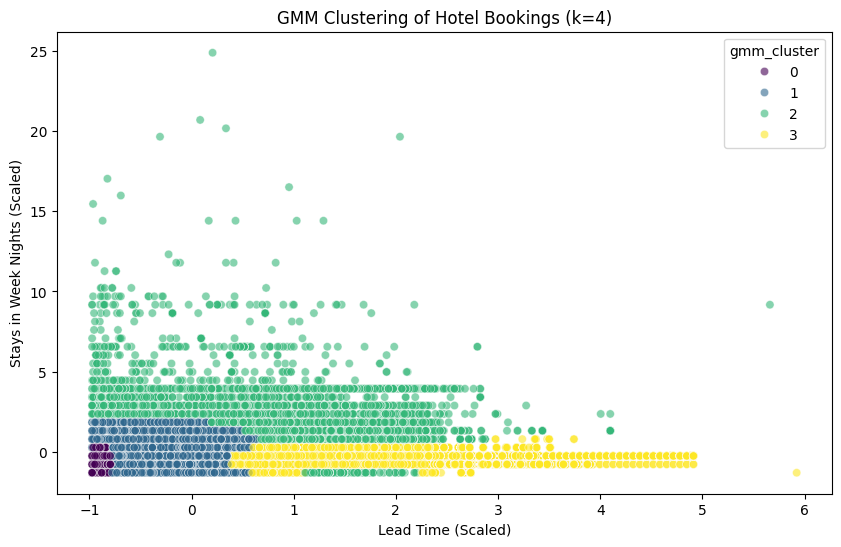

In [8]:
# Fit GMM with the same number of clusters
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(scaled_df[['lead_time', 'stays_in_week_nights']])

# Predict soft clusters (probabilities)
gmm_probs = gmm.predict_proba(scaled_df[['lead_time', 'stays_in_week_nights']])

# Visualize the GMM results
# We can visualize the clusters based on the most probable cluster for each data point,
# or visualize the probabilities themselves (e.g., using alpha or size).
# For comparison with KMeans, let's visualize based on the most probable cluster.
gmm_clusters = gmm.predict(scaled_df[['lead_time', 'stays_in_week_nights']])
scaled_df['gmm_cluster'] = gmm_clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='lead_time', y='stays_in_week_nights', hue='gmm_cluster', palette='viridis', alpha=0.6)
plt.title('GMM Clustering of Hotel Bookings (k=4)')
plt.xlabel('Lead Time (Scaled)')
plt.ylabel('Stays in Week Nights (Scaled)')
plt.show()

# You can also explore the probabilities
# display(pd.DataFrame(gmm_probs).head())

### ✍️ Your Response: 🔧
1. GMM produced softer, more blended cluster boundaries, while KMeans created harder, more separated groups. In the GMM plot, some guests fall between clusters instead of being forced into just one group, which reflects more realistic guest behavior.

2. GMM can help answer questions where guests do not fit neatly into one type — for example, guests who sometimes plan ahead but also sometimes book last-minute.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


In [14]:
# Calculate WCSS for KMeans
wcss = kmeans.inertia_

# Calculate Silhouette Score for KMeans
silhouette_avg_kmeans = silhouette_score(scaled_df[features], scaled_df['kmeans_cluster'])

# Calculate Davies-Bouldin Index for KMeans
davies_bouldin_kmeans = davies_bouldin_score(scaled_df[features], scaled_df['kmeans_cluster'])

print(f"KMeans Metrics (k={k}):")
print(f"WCSS: {wcss:.2f}")
print(f"Silhouette Score: {silhouette_avg_kmeans:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}")

print("-" * 30)

# Calculate Silhouette Score for GMM
silhouette_avg_gmm = silhouette_score(scaled_df[features], scaled_df['gmm_cluster'])

# Calculate Davies-Bouldin Index for GMM
davies_bouldin_gmm = davies_bouldin_score(scaled_df[features], scaled_df['gmm_cluster'])

print(f"GMM Metrics (k={k}):")
# WCSS is not directly applicable to GMM in the same way as KMeans
print("WCSS: N/A (GMM does not have WCSS)")
print(f"Silhouette Score: {silhouette_avg_gmm:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_gmm:.2f}")

KMeans Metrics (k=4):
WCSS: 346243.75
Silhouette Score: 0.23
Davies-Bouldin Index: 1.41
------------------------------
GMM Metrics (k=4):
WCSS: N/A (GMM does not have WCSS)
Silhouette Score: 0.09
Davies-Bouldin Index: 2.45


### ✍️ Your Response: 🔧
1. KMeans performed better. It had a higher Silhouette Score (0.23 vs. 0.09) and a lower Davies-Bouldin Index (1.41 vs. 2.45), meaning its clusters were more distinct and better separated than the GMM clusters.

2. I would recommend KMeans because it produced clearer, more usable clusters and is easier to interpret and explain to non-technical stakeholders. GMM is useful when customer behavior overlaps, but its results here were less distinct, making KMeans the better choice for practical business segmentation.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In [12]:
# Add KMeans cluster labels to the original dataframe for easier interpretation
df_clustered_kmeans = df_selected.copy()
df_clustered_kmeans['kmeans_cluster'] = scaled_df['kmeans_cluster']

# Review characteristics of each KMeans cluster
print("KMeans Cluster Characteristics:")
display(df_clustered_kmeans.groupby('kmeans_cluster')[features].mean())

# You can do the same for GMM clusters if needed
# df_clustered_gmm = df_selected.copy()
# df_clustered_gmm['gmm_cluster'] = scaled_df['gmm_cluster']
# print("\nGMM Cluster Characteristics:")
# display(df_clustered_gmm.groupby('gmm_cluster')[features].mean())

KMeans Cluster Characteristics:


,lead_time,stays_in_week_nights,stays_in_weekend_nights,adr,total_of_special_requests
kmeans_cluster,,,,,
0,45.504168,1.755681,0.628329,86.568845,0.226577
1,134.566089,5.801003,2.388476,101.491484,0.526366
2,272.176221,2.200830,0.642105,89.837767,0.195936
3,71.194670,2.313683,0.903631,140.829597,1.553604


### ✍️ Your Response: 🔧
1. The clusters reveal different guest behaviors. Some guests book last-minute, stay briefly, and have few requests. Others book further in advance and stay longer, suggesting business or extended travel. There are also early planners who are low-maintenance, and a premium group who pay higher rates and request more services.

2. The hotel can respond to these groups differently. Last-minute travelers may benefit from quick booking deals, while long-stay guests could get extended-stay discounts or loyalty perks. Early planners might receive early-bird pricing, and premium guests should be offered upgraded rooms, personalized service, and VIP packages.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. The most challenging part was that there are no labels to guide the model, so we must interpret the clusters ourselves. It requires more judgment to decide which patterns are meaningful.

2. Clustering is useful when you want to find natural groupings and don’t have a target variable. It's especially helpful when exploring new markets or customer behavior patterns.

3. Clustering helps us discover different types of customers who behave differently, even if we didn’t know those groups existed. This allows the business to tailor marketing and services to each group, increasing impact and efficiency.

4. This assignment connects directly to my goal of using analytics to support strategic decisions, because clustering required me to interpret customer behavior patterns in a way that informs targeted marketing and resource planning. Just like in global semiconductor distribution, segmentation helps identify different demand profiles, which is essential for planning capacity and pricing strategies. It also parallels supply chain risk analytics, where understanding variability and uncertainty in behavior (similar to GMM soft clustering) supports more resilient planning decisions

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [15]:
!jupyter nbconvert --to html "assignment_09_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_09_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 732611 bytes to assignment_09_AlhinaiAlmuhanna.html
